# Session 6 - Homework ANGGORO Fajar Tri

## Exercise 3 Chapter 10

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

,X1,X2,cent.1,cent.2,labels
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,4,1,4,1
2,1,3,1,3,5
3,0,4,0,4,6
4,5,1,5,1,4
5,6,2,6,2,2
6,4,0,4,0,3


,X1,X2,cent.1,cent.2,old_labels,new_labels
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,4,1,4,1,1
2,1,3,1,3,5,1
3,0,4,0,4,6,1
4,5,1,5,1,4,4
5,6,2,6,2,2,4
6,4,0,4,0,3,4


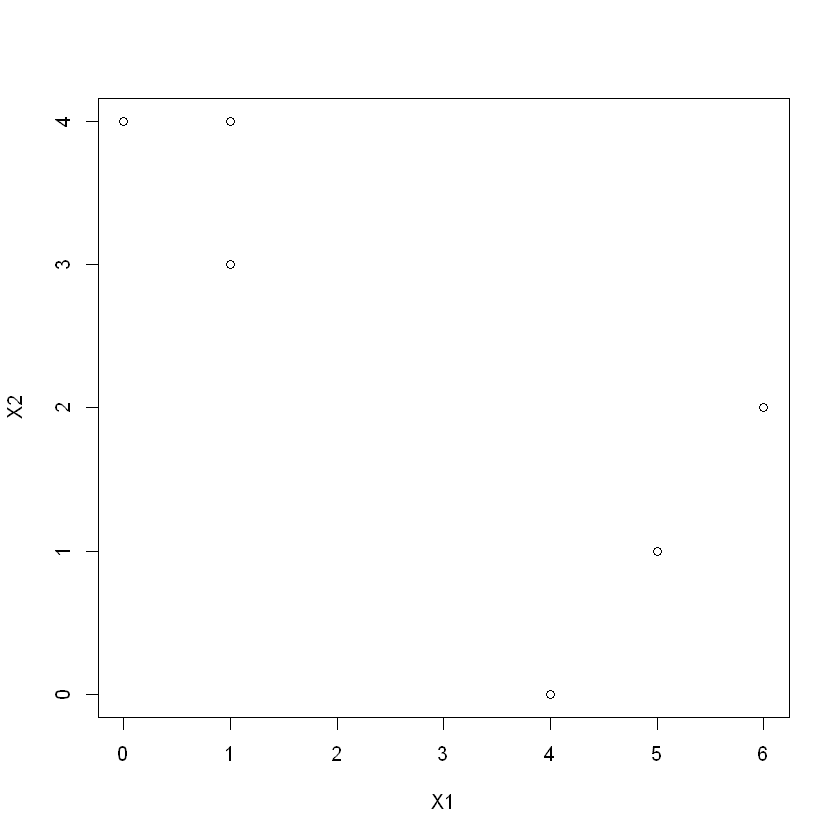

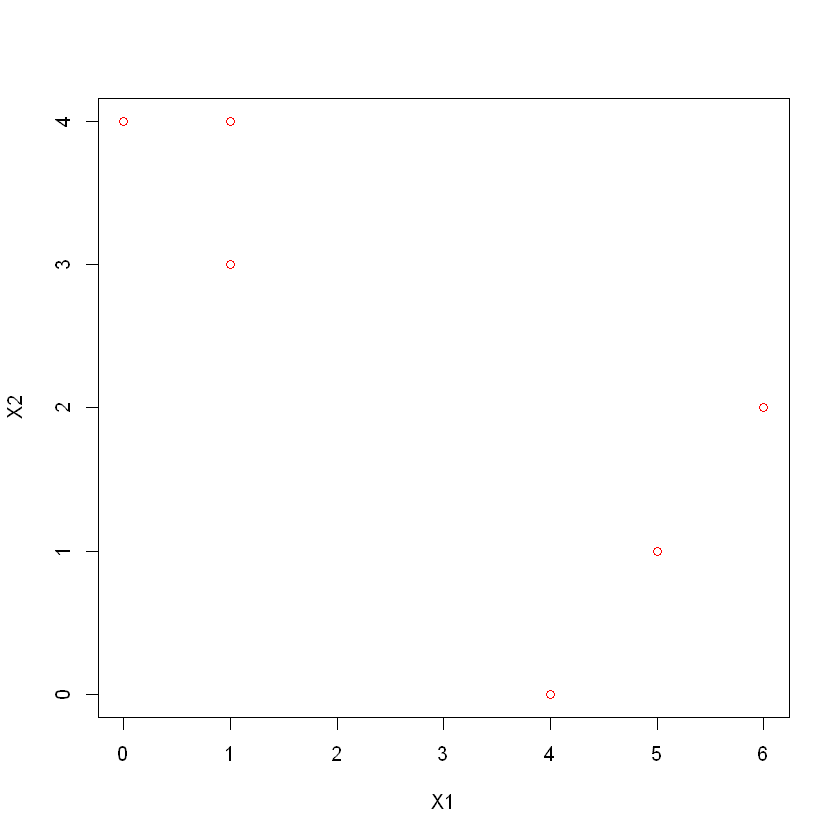

In [7]:
# Set the Data
data = data.frame(c(1,1,0,5,6,4), c(4,3,4,1,2,0))
colnames(data)=c('X1','X2')
rownames(data)=1:6

# a) plot observations
plot(data)

# b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this.Report the cluster labels for each observation.
set.seed(42)
labels = sample(1:6,6)
data = cbind(data, labels)

# c) Compute the centroid for each cluster.
centroids = aggregate(.~labels, data, mean)
colnames(centroids) = c('labels',paste('cent',1:2))
data.frame(data[,-3],centroids[data$labels,-1], labels=data$labels)

# d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance.Report the cluster labels for each observation
# define euclidean distance function

EuclideanDistance <- function(v,z){
  sqrt(sum( (v-z)^2 ))
}

labels = apply(data[,c(1,2)],1,
 function(x){
    dist = apply(centroids[data$labels, c(2,3)], 1, function(y){ EuclideanDistance(x,y) })
    which.min(dist[dist>0])
  }
 )

data.frame(data[,-3], centroids[data$labels,-1], old_labels = data$labels, new_labels = labels)

# e) Repeat (c) and (d) until the answers obtained stop changing.
# do this using while loops until the labels stop changing
while( any(labels != data$labels)){
  data$labels = labels
  centroids = aggregate(.~labels, data, mean)

  labels = apply(data[, c(1,2)],1,
    function(x){
      dist = apply(centroids[data$labels,c(2,3)],1,function(y){ EuclideanDistance(x,y) })
      which.min(dist[dist>0])
    }
   )
  }

  # f) In your plot from (a), color the observations according to the cluster labels obtained.
  plot(data[,c(1,2)], col=rainbow(6)[data$labels])


## Exercise 4 Chapter 10

Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms

In [ ]:
# a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point.
# Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

# Single linkage uses the minimal distance while complete linkage uses the maximum distance. Therefore, there are 2 possibilities:
# - Dmin < Dmax
# - Dmin = Dmax
# the 2nd possibility implies that there would be a single cluster {1,2,3,4,5} instead of the 2 clusters. Thus, the first possibility holds.
# this implies the cluster will fuse at a lower height for the single linkage dendogram

# b) At a certain point on the single linkage dendrogram, the clusters {5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. 
# Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

# same rule applies:
# - Dmin < Dmax
# - Dmin = Dmax
# However, in this case, both possibilities are possible since the points could have be equidistant. Therefore, there isnt enough information to tell

## Exercise 8 Chapter 10

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function. On the USArrests data, calculate PVE in two ways:

In [11]:
# a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

USArrests_scaled = scale(USArrests)
pr.out = prcomp(USArrests_scaled)
pr.var = pr.out$sdev^2
pr.var/sum(pr.var)

# b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. 
# Then, use those loadings in Equation 10.8 to obtain the PVE.

numerator = rowSums(apply(USArrests_scaled,1,function(x){ colSums(x %*% pr.out$rotation )^2  }))

denominator = sum(rowSums(USArrests_scaled^2))
numerator/denominator

[1] 0.62006039 0.24744129 0.08914080 0.04335752

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Exercise 9 Chapter 10

Consider the USArrests data. We will now perform hierarchical clustering on the states.

,names.hclust_cut.,hclust_cut
,<chr>,<int>
Alabama,Alabama,1
Alaska,Alaska,1
Arizona,Arizona,1
California,California,1
Delaware,Delaware,1
Florida,Florida,1
Illinois,Illinois,1
Louisiana,Louisiana,1
Maryland,Maryland,1


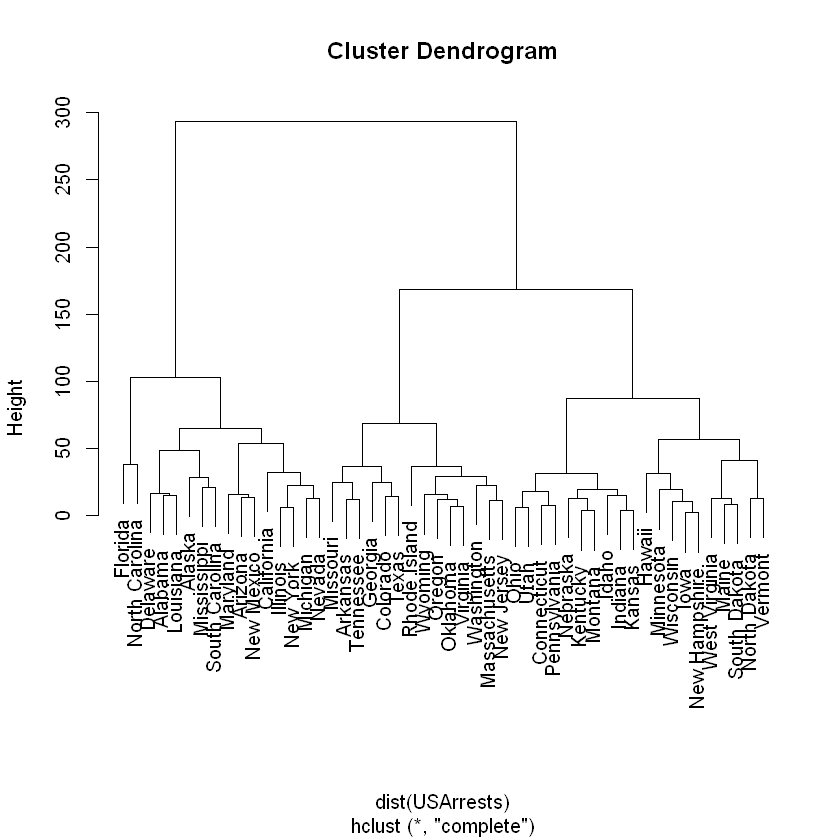

,names.hclust_cut.,hclust_cut
,<chr>,<int>
Alabama,Alabama,1
Alaska,Alaska,1
Georgia,Georgia,1
Louisiana,Louisiana,1
Mississippi,Mississippi,1
North Carolina,North Carolina,1
South Carolina,South Carolina,1
Tennessee,Tennessee,1
,names.hclust_cut.,hclust_cut


hclust_cut,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.087500,252.7500,53.50000,24.53750
2,11.054545,264.0909,79.09091,32.61818
3,5.003226,116.4839,63.83871,16.33871


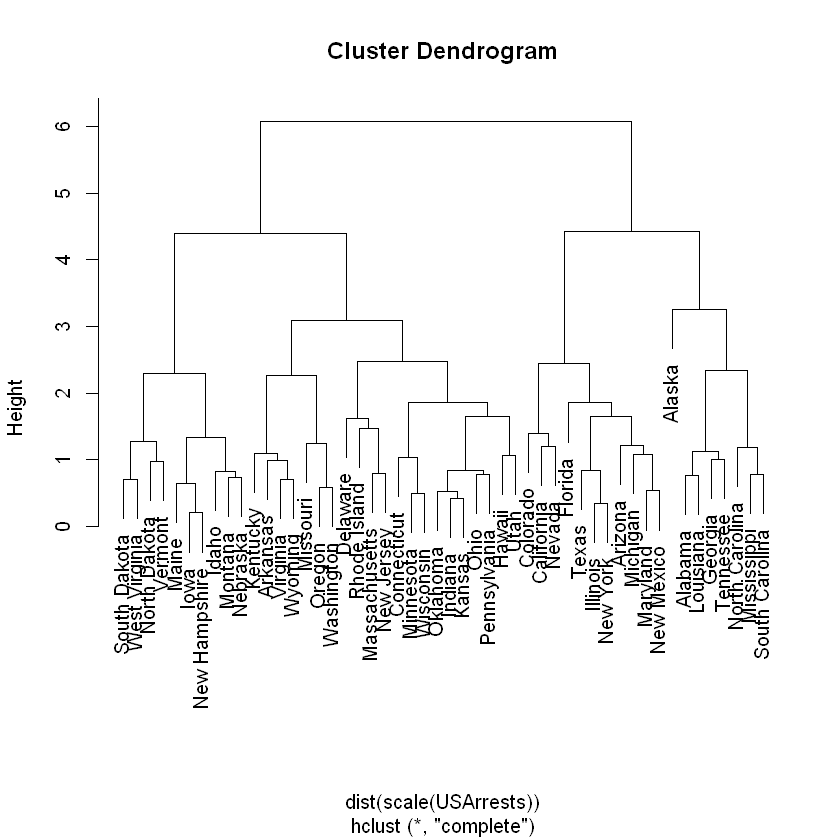

In [12]:
# a)  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
hclust_com = hclust(dist(USArrests), method='complete')
plot(hclust_com)

# b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
hclust_cut = cutree(hclust_com,k = 3)
hclust_cut = split(data.frame(names(hclust_cut), hclust_cut), as.factor(hclust_cut))
hclust_cut

# c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
hclust_scale = hclust(dist(scale(USArrests)), method='complete')
plot(hclust_scale)

# d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be
# scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer
hclust_cut = cutree(hclust_scale,k = 3)
split(data.frame(names(hclust_cut), hclust_cut), as.factor(hclust_cut))
aggregate(USArrests,list(hclust_cut = hclust_cut), mean)
# Scaling is important, it will reduce the range of the tree. Furthermore, it will produces different results

## Exercise 10 Chapter 10

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.


 1  2  3 
19 19 22 

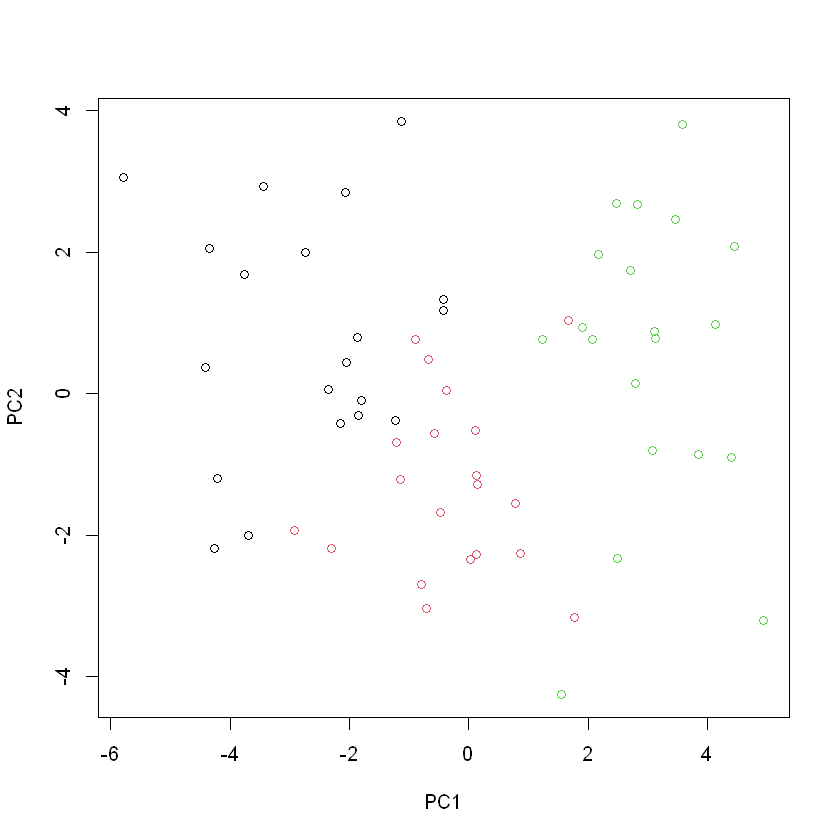


 1  2 
22 38 

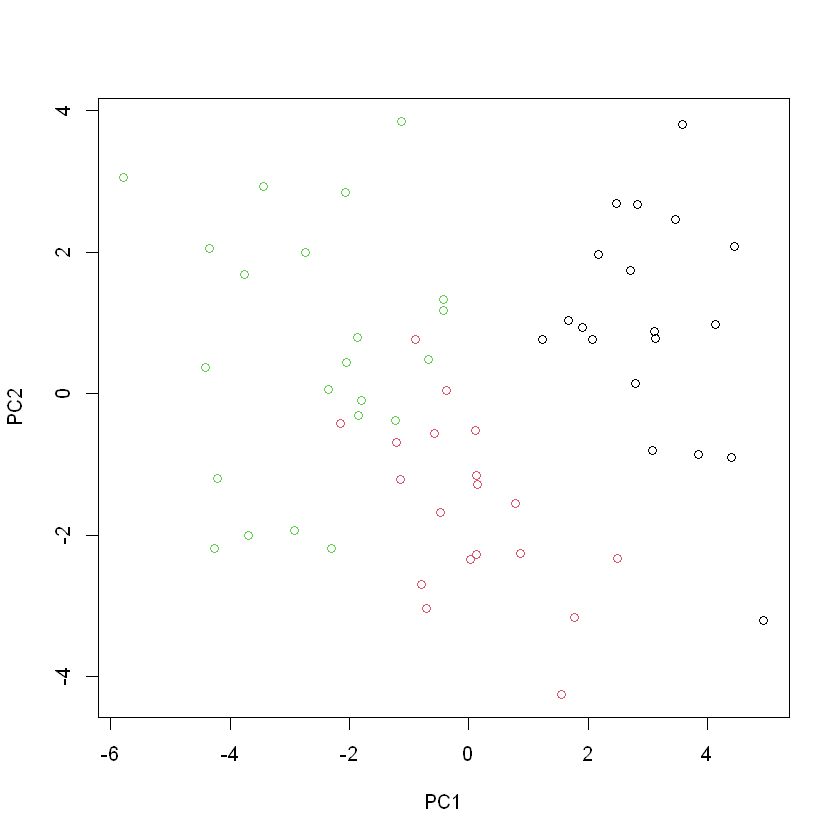


 1  2  3  4 
19 19  7 15 

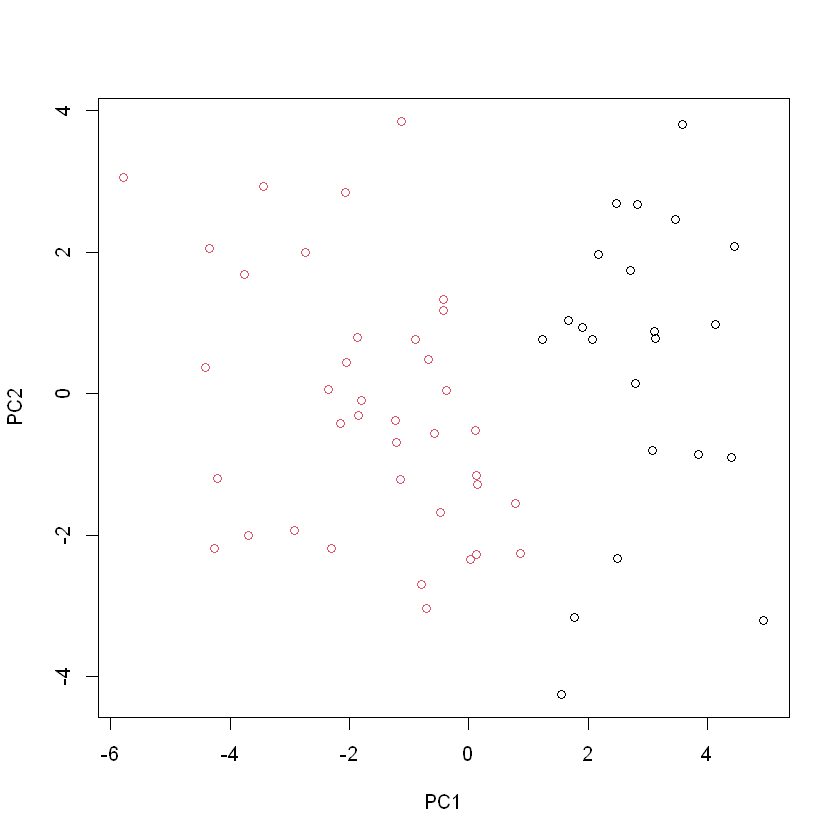


 1  2  3 
19 18 23 

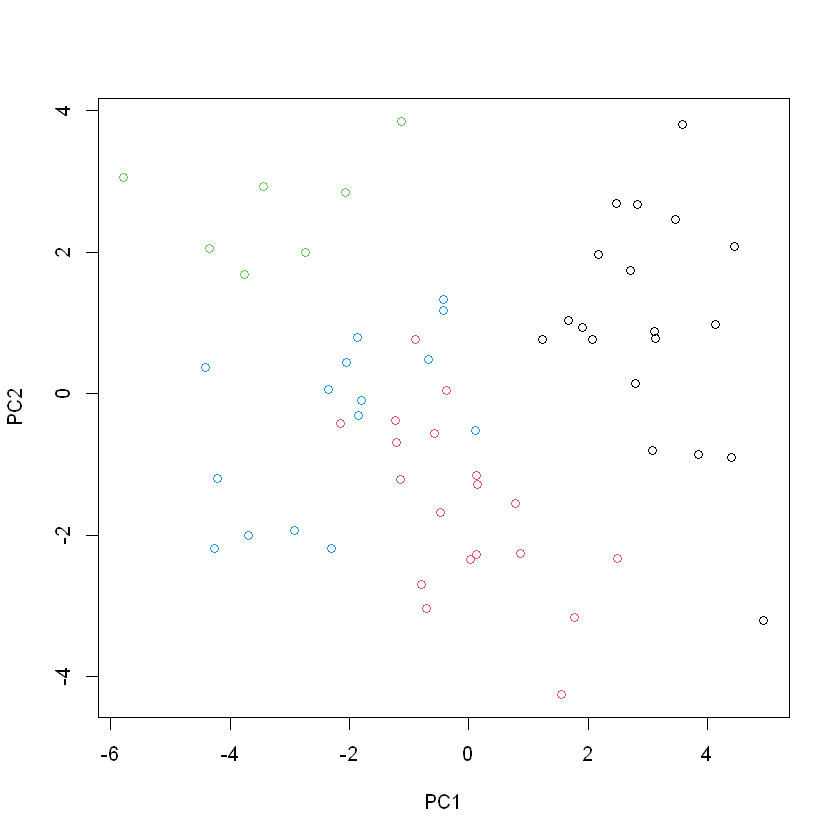


 1  2  3 
18 29 13 

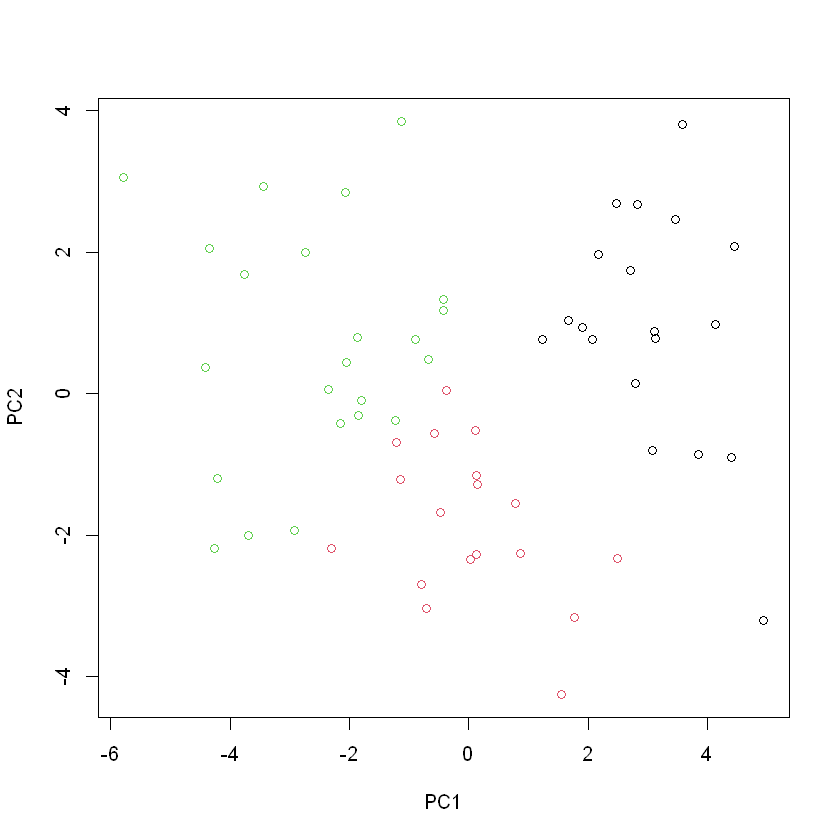

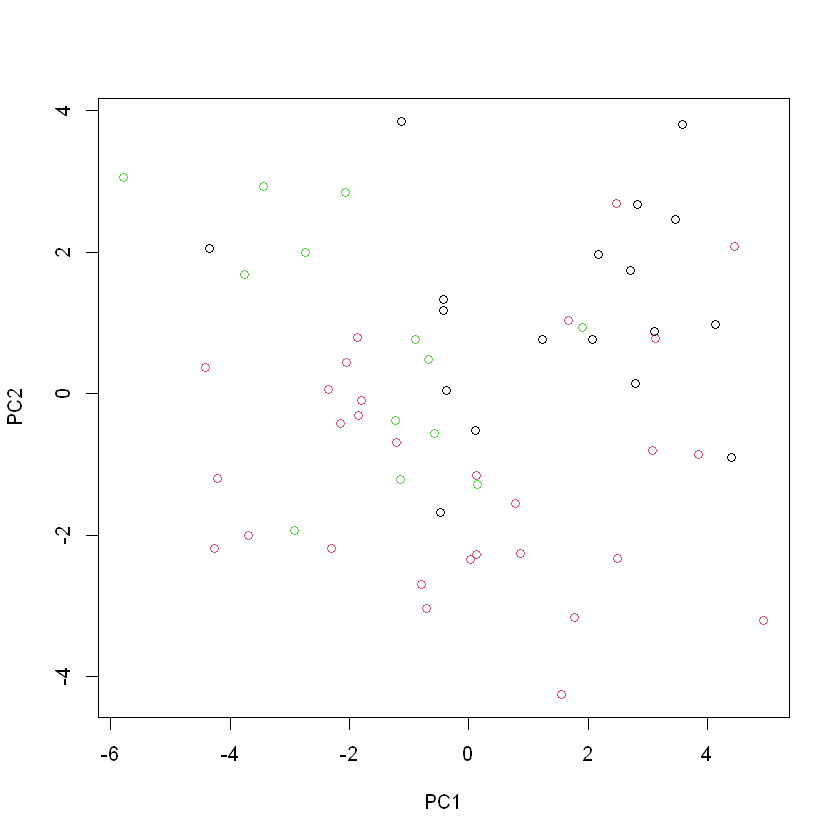

In [19]:
# a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
set.seed(42)
data = matrix(sapply(1:3,function(x){ rnorm(20*50,mean = 10*sqrt(x))  }),ncol=50)    
class = unlist(lapply(1:3,function(x){rep(x,20)}))

# b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate 
# the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If
# not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not
# continue to part (c) until the three classes show at least some separation in the first two principal component score vectors
pr_out=prcomp(data)
plot(pr_out$x[,c(1,2)], col=class)

# c)  Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
set.seed(42)
kmeans_res = kmeans(data,3)

table(kmeans_res$cluster)
plot(pr_out$x[,c(1,2)], col = kmeans_res$cluster)

# d) Perform K-means clustering with K = 2. Describe your results
set.seed(42)
kmeans_2 = kmeans(data,2)

table(kmeans_2$cluster)
plot(pr_out$x[,c(1,2)], col = kmeans_2$cluster)

# e) Now perform K-means clustering with K = 4, and describe your results.
set.seed(42)
kmeans_4 = kmeans(data,4)

table(kmeans_4$cluster)
plot(pr_out$x[,c(1,2)], col = kmeans_4$cluster)

# f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. 
# That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score
# vector, and the second column is the second principal component score vector. Comment on the results.
set.seed(42)
kmeans_pca = kmeans(pr_out$x[,c(1,2)],3)

table(kmeans_pca$cluster)
plot(pr_out$x[,c(1,2)], col = kmeans_pca$cluster)

# g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard
# deviation one. How do these results compare to those obtained in (b)? Explain.
set.seed(42)
kmeans_scale = kmeans(scale(data,center = TRUE, scale = TRUE),3)

table(kmeans_scale$cluster)
plot(pr_out$x[,c(1,2)], col = kmeans_scale$cluster)

### Source
https://rpubs.com/evertonjlima/245990